# Random Forest - Indicators of Heart Disease
## G8

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Load dataset

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import copy
import math

%matplotlib inline
df = pd.read_csv("/content/drive/MyDrive/heart_2020_cleaned.csv", delimiter=',') #ADD PATH TO THE DATASETS
print(df.shape)

(319795, 18)


##Data Cleaning

Check null value





In [ ]:
df.isnull().sum()


HeartDisease        0
BMI                 0
Smoking             0
AlcoholDrinking     0
Stroke              0
PhysicalHealth      0
MentalHealth        0
DiffWalking         0
Sex                 0
AgeCategory         0
Race                0
Diabetic            0
PhysicalActivity    0
GenHealth           0
SleepTime           0
Asthma              0
KidneyDisease       0
SkinCancer          0
dtype: int64

Check duplicated value


In [ ]:
df.duplicated().sum()


18078

Remove duplicated


In [ ]:
df.drop_duplicates(inplace=True)
print(df.shape)

(301717, 18)


## Handling unbalanced data

In [ ]:
from sklearn.preprocessing import LabelEncoder

df2=df
cols = ['HeartDisease', 'Smoking', 'AlcoholDrinking','Stroke','DiffWalking','Sex','AgeCategory','Race','Diabetic','PhysicalActivity','GenHealth','Asthma','KidneyDisease','SkinCancer']
df2[cols] = df2[cols].apply(LabelEncoder().fit_transform)

##Split Dataset for Training and Testing

In [ ]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
x=df2.drop('HeartDisease',axis=1).values   #drop the target
y=df2['HeartDisease'].values

sm = SMOTE(random_state=42)  #using the Synthetic Minority Over-sampling Technique (SMOTE) to handle class imbalance in a dataset
X, Y = sm.fit_resample(x, y)

x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.30,random_state=42) #Splitting Dataset into Training and Testing


##Use GridSearchCV to find the best hyperparameters

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, ConfusionMatrixDisplay
from sklearn.model_selection import GridSearchCV, train_test_split

pram_grid = {"max_depth": [2,3,4] , 'max_features': [3,4,5] } # Define the parameter grid for GridSearchCV
clf = RandomForestClassifier()
grid = GridSearchCV(estimator= clf , param_grid= pram_grid , cv = 5 ) # Create a GridSearchCV instance with the RandomForestClassifier, parameter grid, and 5-fold cross-validation
grid_result = grid.fit(x_train , y_train) # Fit the model to the training data using GridSearchCV

# print(grid_result)
print ("Best: %f using %s" %(grid_result.best_score_ , grid_result.best_params_))

Best: 0.816486 using {'max_depth': 4, 'max_features': 4}


##Modeling (Random Forest)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, ConfusionMatrixDisplay
rf = RandomForestClassifier(max_depth= 4, max_features=4 ) # add the best hypermeters
rf.fit(x_train , y_train)


RandomForestClassifier(max_depth=4, max_features=4)

In [ ]:
import joblib
# Save the trained model to a file
joblib.dump(rf, 'random_forest_model.joblib')  # You can choose any filename you prefer

# Load the model back into memory
loaded_rf_model = joblib.load('random_forest_model.joblib')

# Use the loaded model to make predictions
y_pred = loaded_rf_model.predict(x_test)


###Model evaluation

In [ ]:
from sklearn.metrics import classification_report

print('Accuracy:', accuracy_score(y_test, y_pred))
print('Precision:', precision_score(y_test, y_pred))
print('Recall:', recall_score(y_test, y_pred))
print('F1-score:', f1_score(y_test, y_pred))

print(classification_report(y_test,y_pred))


Accuracy: 0.8179190400427512
Precision: 0.7959427342051612
Recall: 0.856199488676982
F1-score: 0.8249722724884713
              precision    recall  f1-score   support

           0       0.84      0.78      0.81     82143
           1       0.80      0.86      0.82     82531

    accuracy                           0.82    164674
   macro avg       0.82      0.82      0.82    164674
weighted avg       0.82      0.82      0.82    164674



Confusion Matrix:
[[64027 18116]
 [11868 70663]]


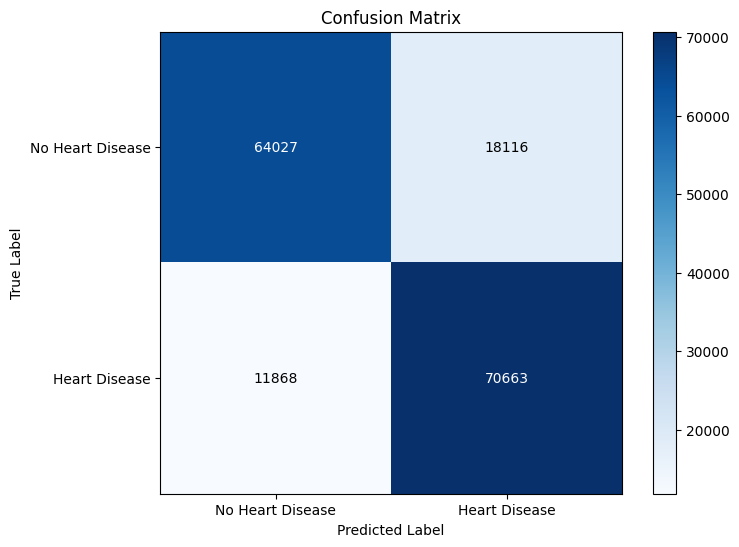

In [ ]:
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)
# Plot Confusion Matrix
plt.figure(figsize=(8, 6))
plt.imshow(conf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()

classes = ['No Heart Disease', 'Heart Disease']
tick_marks = np.arange(len(classes))

plt.xticks(tick_marks, classes)
plt.yticks(tick_marks, classes)

plt.xlabel('Predicted Label')
plt.ylabel('True Label')

for i in range(len(classes)):
    for j in range(len(classes)):
        plt.text(j, i, str(conf_matrix[i, j]), ha='center', va='center', color='white' if conf_matrix[i, j] > conf_matrix.max() / 2.0 else 'black')

plt.show()

AUC: 0.82


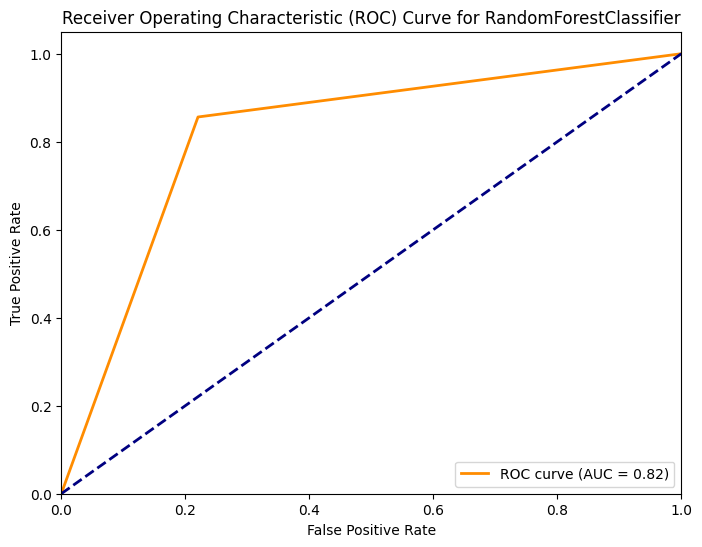

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)
print(f"AUC: {roc_auc:.2f}")
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for RandomForestClassifier')
plt.legend(loc='lower right')
plt.show()